## ID : 816000325
## Name: Ajay Sieunarine
## Email: ajay.sieunarine@my.uwi.edu

In this assignment I will use the provided survey to determine how companies treat employees burdened with mental health issues.

1. Are companies giving them enough attention?
2. Are they giving them benefits?
3. Are they treating them fairly?
4. Are they being given adequate recovery time (if needed)?
5. Are they being medically treated?

In [197]:
import pandas as pd # library to help with files and dataframes
from collections import Counter # for counting string columns
from matplotlib import pyplot as plt # package to help with plotting points 
import seaborn as sns # package to help with graphs and plots for data vis
import numpy as np # library to help with data structs, np.array etc
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
# plt.style.use('dark_background') # turn off for light theme
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

In [198]:
df = pd.read_csv('survey.csv')
df.shape

(1259, 27)

In [199]:
df.head() # check to see if the file is read into a dataframe

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [200]:
df = df.drop([ # drop the unnecessary cols
    'Timestamp', 
    'comments'
], axis=1) 

In [201]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [202]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

# I will now attempt to sanitize the data
- Apply LabelEncoders to the relevant cols
- Change the data type of cols (if needed)

## Changing data types of some cols

In [203]:
# give existing cols their appropriate types
df = df.astype(str)
df['Age'] = df['Age'].astype('int64')
df['Gender'] = df['Gender'].astype('str')
df['Country'] = df['Country'].astype('str')
df['self_employed'] = df['self_employed'].astype('str')
df['family_history'] = df['family_history'].astype('str')
df['treatment'] = df['treatment'].astype('str')
df['work_interfere'] = df['work_interfere'].astype('str')
df['remote_work'] = df['remote_work'].astype('str')
df['benefits'] = df['benefits'].astype('str')
df['care_options'] = df['care_options'].astype('str')
df['wellness_program'] = df['wellness_program'].astype('str')
df['seek_help'] = df['seek_help'].astype('str')
df['anonymity'] = df['anonymity'].astype('str')
df['leave'] = df['leave'].astype('str')
df['phys_health_consequence'] = df['phys_health_consequence'].astype('str')
df['phys_health_interview'] = df['phys_health_interview'].astype('str')
df['mental_health_consequence'] = df['mental_health_consequence'].astype('str')
df['coworkers'] = df['coworkers'].astype('str')
df['supervisor'] = df['supervisor'].astype('str')
df['mental_health_interview'] = df['mental_health_interview'].astype('str')
df['obs_consequence'] = df['obs_consequence'].astype('str')
df['no_employees'] = df['no_employees'].astype('str')

In [204]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

### Gender Column

- I will use a LabelEncoder to check the entries.
- I will use the built in apply() method to clean the data accordingly

In [205]:
gender_encoder = LabelEncoder()
gender_encoder.fit(df['Gender'])
gender_encoder.classes_

array(['A little about you', 'Agender', 'All', 'Androgyne', 'Cis Female',
       'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ',
       'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^',
       'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)',
       'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman',
       'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f',
       'femail', 'female', 'fluid', 'm', 'maile', 'male',
       'male leaning androgynous', 'msle', 'non-binary',
       'ostensibly male, unsure what that really means', 'p', 'queer',
       'queer/she/they', 'something kinda male?', 'woman'], dtype=object)

We can see that applicants entered some very interesting results. I am only interested in Males and Females, however, I will classify the remainders as 'Other'.

In [206]:
# replace the gender column with a new col, labeled 'sex'
def isMale(x):
    if x[0] == 'm':
        if "man" in x or "male" or len(x) == 1:
            return True
    return False

def isFemale(x):
    if x[0] == 'f' or x[0] == 'w':
        if "woman" in x or "female" or len(x) == 1:
            return True
    return False
    
def setGender(x):
    x = str(x.lower())
    if isMale(x):
        return "Male"
    if isFemale(x):
        return "Female"
    else:
        return "Other"
    
df['temp_gender'] = df['Gender'].apply(
    lambda x: setGender(x)
)
df[['Gender', 'temp_gender']].query('temp_gender == "Other"').head()

,Gender,temp_gender
72,Trans-female,Other
83,Cis Female,Other
93,something kinda male?,Other
98,Cis Male,Other
306,queer/she/they,Other


The map/apply method is working.

Now I will drop the temp column.

In [207]:
df['Gender'] = df['temp_gender']
del df['temp_gender']

sex_encoder = LabelEncoder()
sex_encoder.fit(df['Gender'])
print(sex_encoder.classes_)
print(df['Gender'].describe())
df.head()

['Female' 'Male' 'Other']
count     1259
unique       3
top       Male
freq       988
Name: Gender, dtype: object


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,nan,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,nan,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,nan,nan,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,nan,nan,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,nan,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Country col

In [208]:
country_encoder = LabelEncoder()
country_encoder.fit(df['Country'])
country_encoder.classes_

array(['Australia', 'Austria', 'Bahamas, The', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico',
       'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'United Kingdom', 'United States',
       'Uruguay', 'Zimbabwe'], dtype=object)

In [209]:
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Poland                      7
Switzerland                 7
Italy                       7
Brazil                      6
South Africa                6
Belgium                     6
Israel                      5
Bulgaria                    4
Singapore                   4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Greece                      2
Colombia                    2
Portugal                    2
Croatia                     2
Denmark                     2
Moldova                     1
Costa Rica                  1
Spain                       1
Bosnia and Herzegovina      1
Czech Repu

Based on the counts of some of these entries, I will rename the ones that occur less than 10 times as 'Other'

In [210]:
# country_others = df[df.groupby('Country').cumcount()<10]
country_others = df.groupby("Country").filter(lambda g: (g.Country.size < 10))

print (country_others.shape)
country_others['Country'].value_counts()
# country_others.head()
co_total = country_others['Country'].count()
print("total rows: ", co_total)
co_unique_list = country_others['Country'].unique()
co_unique = len(co_unique_list)
print("unique rows: ", co_unique)
co_mean = int(round(co_total/co_unique))
print("mean: ", co_mean)

country_mains = df.groupby("Country").filter(lambda g: (g.Country.size >= 10))
country_mains['Country'].value_counts()

# type(country_others) # a pd series
# set(country_others['Country'])
def pruneCountry(x):
    if x in set(country_others['Country']):
        return "Other"
    else:
        return x


df['temp'] = df['Country'].apply(
    lambda x: pruneCountry(x)
)
countries_new = df['temp']
df.query('temp == "Other"')

del df['temp']
df.query('Country == "Other"')

(108, 25)
total rows:  108
unique rows:  39
mean:  3


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


### Age Column:

In [211]:
age_encoder = LabelEncoder()
age_encoder.fit(df['Age'])
age_encoder.classes_

array([      -1726,         -29,          -1,           5,           8,
                11,          18,          19,          20,          21,
                22,          23,          24,          25,          26,
                27,          28,          29,          30,          31,
                32,          33,          34,          35,          36,
                37,          38,          39,          40,          41,
                42,          43,          44,          45,          46,
                47,          48,          49,          50,          51,
                53,          54,          55,          56,          57,
                58,          60,          61,          62,          65,
                72,         329, 99999999999], dtype=int64)

We can see that some of the values are extreme outliers (as well as invalid entries). This can affect the the graphs and plots, so I shall set them to 0, find the mean, then replace the 0 values with the mean value.

In [212]:
def pruneAge(x):
    if x >= 100:
        return 0
    if x <= 14:
        return 0
    return x

df['temp_age'] = df['Age'].apply(
    lambda x: pruneAge(x)
)

age_encoder.fit(df['temp_age'])
age_encoder.classes_
df[['Age', 'temp_age']].head()

,Age,temp_age
0,37,37
1,44,44
2,32,32
3,31,31
4,31,31


In [213]:
mean_age = df['temp_age'].mean()
mean_age = round(mean_age)
mean_age

32

In [214]:
def fillAge(x):
    if x == 0:
        return mean_age
    else:
        return x
    
df['temp_age'] = df['temp_age'].apply(
    lambda x: fillAge(x)
)

age_encoder.fit(df['temp_age'])
age_encoder.classes_

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72], dtype=int64)

all the trash ages have been pruned, now to apply it to the dataframe

In [215]:
df['Age'] = df['temp_age']
del df['temp_age']
age_encoder.fit(df['Age'])
print(age_encoder.classes_)
df.head()

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,nan,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,nan,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,nan,nan,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,nan,nan,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,nan,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### State Column

In [216]:
state_encoder = LabelEncoder()
state_encoder.fit(df['state'])
state_encoder.classes_

array(['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY', 'nan'], dtype=object)

there are null records present in this column. I will change the null records to "Unknown"

In [217]:
def pruneStates(x):
    if x is None or pd.isnull(x) or x == "nan":
        return "Unknown"
    else:
        return x

df['temp_state'] = df['state'].apply(
    lambda x: pruneStates(x)
)

df[['state', 'temp_state']].query('state == "nan"').head()

,state,temp_state
2,nan,Unknown
3,nan,Unknown
7,nan,Unknown
9,nan,Unknown
11,nan,Unknown


In [218]:
df['state'] = df['temp_state']
del df['temp_state']
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,nan,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,nan,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,nan,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,nan,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,nan,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### self_employed Column

In [219]:
se_encoder = LabelEncoder()
se_encoder.fit(df['self_employed'])
se_encoder.classes_

array(['No', 'Yes', 'nan'], dtype=object)

Replace nan values with Unknown.

In [220]:
def pruneSE(x):
    if pd.isnull(x) or x == "nan":
        return "Unknown"
    return x

df['temp_se'] = df['self_employed'].apply(
    lambda x: pruneSE(x)
)

df[['self_employed', 'temp_se']].head()

,self_employed,temp_se
0,nan,Unknown
1,nan,Unknown
2,nan,Unknown
3,nan,Unknown
4,nan,Unknown


In [221]:
df['self_employed'] = df['temp_se']
del df['temp_se']

df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### family_history Column

In [222]:
fh_encoder = LabelEncoder()
fh_encoder.fit(df['family_history'])
fh_encoder.classes_

array(['No', 'Yes'], dtype=object)

No changes needed.

### treatment Column

In [223]:
treatment_encoder = LabelEncoder()
treatment_encoder.fit(df['treatment'])
treatment_encoder.classes_

array(['No', 'Yes'], dtype=object)

No changes needed.

### work_interfere column

In [224]:
wi_encoder = LabelEncoder()
wi_encoder.fit(df['work_interfere'])
wi_encoder.classes_

array(['Never', 'Often', 'Rarely', 'Sometimes', 'nan'], dtype=object)

prune nan values

In [225]:
def pruneWI(x):
    if pd.isnull(x) or x == "nan":
        return "Unknown"
    return x

df['temp_wi'] = df['work_interfere'].apply(
    lambda x: pruneWI(x)
)

df[['work_interfere', 'temp_wi']].query('work_interfere == "nan"').head()

,work_interfere,temp_wi
19,nan,Unknown
26,nan,Unknown
37,nan,Unknown
38,nan,Unknown
41,nan,Unknown


In [226]:
df['work_interfere'] = df['temp_wi']
del df['temp_wi']
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### remote_work column

In [227]:
rw_encoder = LabelEncoder()
rw_encoder.fit(df['remote_work'])
rw_encoder.classes_

array(['No', 'Yes'], dtype=object)

No changes needed.

### no_employees column

In [228]:
ne_encoder = LabelEncoder()
ne_encoder.fit(df['no_employees'])
ne_encoder.classes_

array(['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000'],
      dtype=object)

In [229]:
df['no_employees'].head()

0              6-25
1    More than 1000
2              6-25
3            26-100
4           100-500
Name: no_employees, dtype: object

No changes needed, this col can be used as a Classifiable df.

### tech_company column

In [230]:
tc_encoder = LabelEncoder()
tc_encoder.fit(df['tech_company'])
tc_encoder.classes_

array(['No', 'Yes'], dtype=object)

No changes needed.

### benefits col

In [231]:
tc_encoder = LabelEncoder()
tc_encoder.fit(df['tech_company'])
tc_encoder.classes_

array(['No', 'Yes'], dtype=object)

No changes needed.

### care_options col

In [232]:
co_encoder = LabelEncoder()
co_encoder.fit(df['care_options'])
co_encoder.classes_

array(['No', 'Not sure', 'Yes'], dtype=object)

No changes needed.

### wellness_program col

In [233]:
wp_encoder = LabelEncoder()
wp_encoder.fit(df['wellness_program'])
wp_encoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

No changes needed.

### seek_help col

In [234]:
encoder = LabelEncoder()
encoder.fit(df['seek_help'])
encoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

No changes needed.

### anonymity col

In [235]:
encoder.fit(df['anonymity'])
encoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

No changes needed.

### leave col

In [236]:
encoder.fit(df['leave'])
encoder.classes_

array(["Don't know", 'Somewhat difficult', 'Somewhat easy',
       'Very difficult', 'Very easy'], dtype=object)

No changes needed.

### mental_health_consequence col

In [237]:
encoder.fit(df['mental_health_consequence'])
encoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

No changes needed.

### coworkers col

In [238]:
encoder.fit(df['coworkers'])
encoder.classes_

array(['No', 'Some of them', 'Yes'], dtype=object)

No changes needed.

### supervisor col

In [239]:
encoder.fit(df['supervisor'])
encoder.classes_

array(['No', 'Some of them', 'Yes'], dtype=object)

### mental_health_interview col

In [240]:
encoder.fit(df['mental_health_interview'])
encoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

### phys_health_interview col

In [241]:
encoder.fit(df['phys_health_interview'])
encoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

### mental_vs_phsyical col 

In [242]:
encoder.fit(df['mental_vs_physical'])
encoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

### obs_consequence col

In [243]:
encoder.fit(df['obs_consequence'])
encoder.classes_

array(['No', 'Yes'], dtype=object)

## data sanitization process complete

In [244]:
df.shape # retained all rows, dropped the 2 cols

(1259, 25)

In [245]:
all_nan_cols = df.columns[df.isna().all()] # store a pandas index that will reference any columns with only null values
df[all_nan_cols].head() # no null values

""
0
1
2
3
4


# Plots and Data Analysis

## Concerns of Mental Health. Where does it come from?

- Hereditary?
- Age dependent?
- Location dependent?
- Type of job?

## Are mental health problems hereditary?

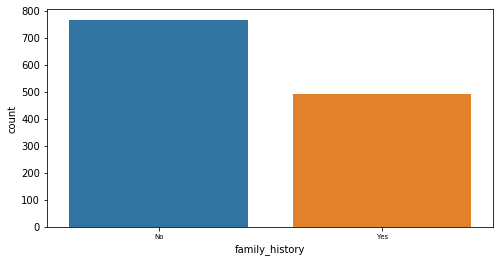

In [246]:
fh_counts = Counter(df['family_history'])
sns.countplot(x=df['family_history'], data=df)

Based on the countplot above, it is unlikely that mental health issues are hereditary.

## Are mental health problems dependent on Age?

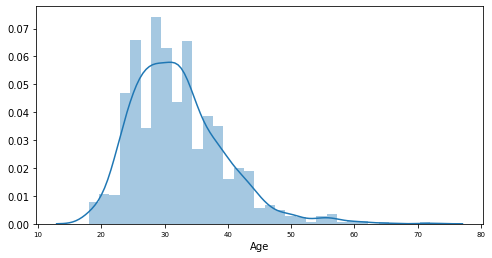

In [247]:
sns.distplot(df['Age'])

The incidents start to rise as early as in the twenties, peaks at around thirty, but then starts to decrease significantly around forty five.

Based on this distribution plot, I would say mental health issues ARE age related.

## Are mental health issues location dependent?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

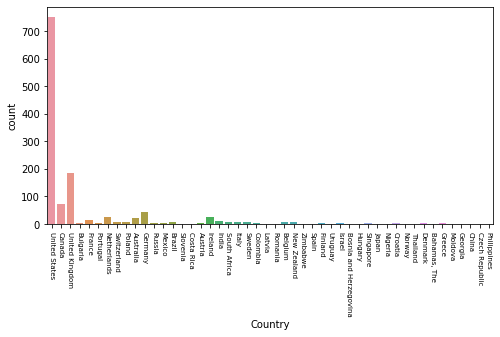

In [248]:
# count plot (bar plot)
sns.countplot(x='Country', data=df)

#rotate x-labels
plt.xticks(rotation=-90)

There are significantly more employees with mental health issues in the US. Followed by UK and Canada with the other countries having very low incidences. The population of ths US, however is far greater than the other countries and perhaps instead of using the absolute values, a rate considering the population may have been more useful in the interpretation of the data.

## Are mental health issues dependent on the type of job a person has?

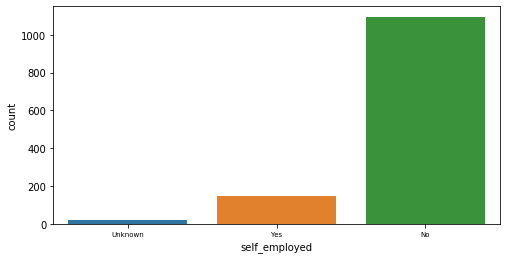

In [249]:
se_yes = df.query('self_employed == "Yes"')
rw_yes = df.query('remote_work == "Yes"')
tc_yes = df.query('tech_company == "Yes"')

# print(se_yes.shape)
# se_yes

# count plot (bar plot)
sns.countplot(x='self_employed', data=df)

Someone who is self employed, is about 5 times LESS likely to suffer from mental health issues.

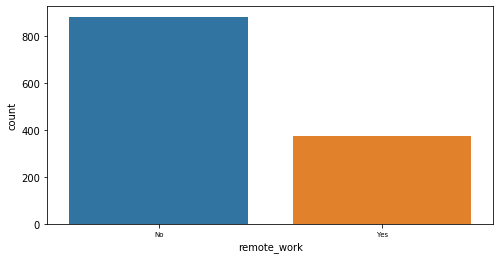

In [250]:
sns.countplot(x='remote_work', data=df)

Persons who do remote work are half as likely to suffer from mental health issues compared to those who have to attend their place of employment.

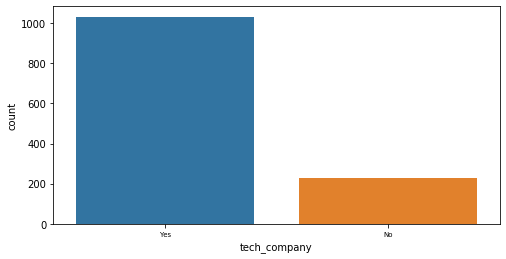

In [251]:
sns.countplot(x='tech_company', data=df)

Persons who work in a tech company are almost five times as likely to suffer from a mental health issues, unlike someone who works elsewhere.

## Are employers tending to their employees who suffer from mental health issues?
	- Are they?
	- Are they giving benefits to them?
	- Are they being treated fairly?
	- Are they given recovery time (if needed)?
    - Are they being medically treated?

## Are employers aware of their employees who suffer from mental health issues?

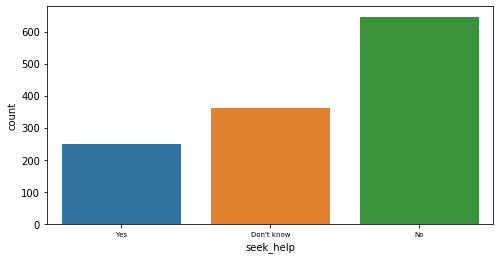

In [252]:
sns.countplot(x='seek_help', data=df)

Half of the employers are not aiding in the betterment of their employees' mental health as viewed in the bar chart above.  

## Are employers giving benefits to their employees with mental health issues?

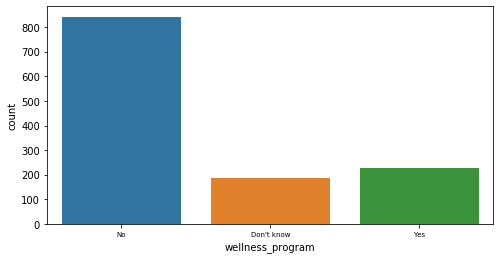

In [253]:
sns.countplot(x='wellness_program', data=df)

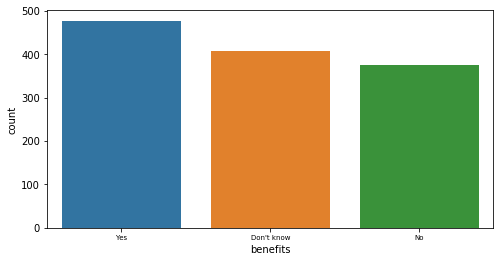

In [254]:
sns.countplot(x='benefits', data=df)

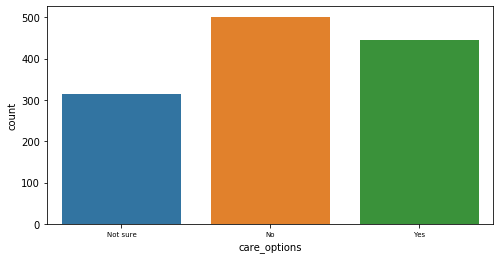

In [255]:
sns.countplot(x='care_options', data=df)

Employers typically do not care about the state of their employees' mental health. This is evident since twice as many employees not getting access to a wellness program at their workplace. Additionally, over half of the employees are not getting benefits from their employer. Moreover, over half of these employees do not have access to care options at their workplace.

## Are employees being treated fairly?

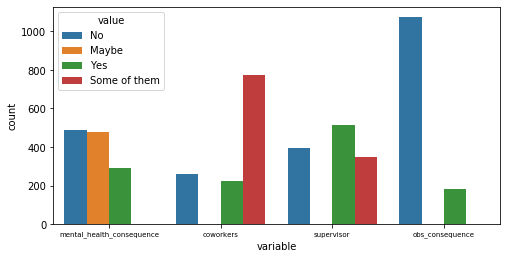

In [263]:
tf_df = df.copy()
tf_df.drop(tf_df.columns.difference(['coworkers','supervisor', 'mental_health_consequence', 'obs_consequence']), 1, inplace=True)
tf_df.head()
# df.head()
sns.countplot(x="variable", hue="value", data=pd.melt(tf_df))

Based on the plot above, employees are being treated very unfairly.

## Are employees being given enough recovery time (if needed)?

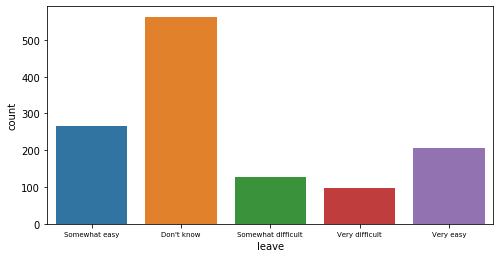

In [267]:
sns.countplot(x="leave", data=df)

Over twice the amount of employees are given adequate recovery time.

## Are employees being medically treated?

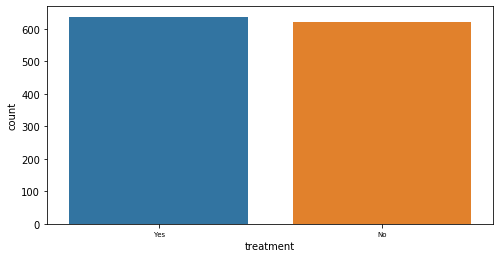

In [269]:
sns.countplot(x="treatment", data=df)

Based on the graph above, just a little under half of the candidates are not being treated, while on the other hand, a little over half of the candidates ARE being treated.